<img src='../img/EU-Copernicus-EUM_3Logos.png' alt='Logo EU Copernicus EUMETSAT' align='right' width='50%'></img>

<br>

<a href="../00_index.ipynb"><< Index</a><span style="float:right;"><a href="./421_Sentinel-3_OLCI_L1_exercise.ipynb">421 - Exercise - Sentinel-3 OLCI - Level 1 >></a></span>

<div class="alert alert-block alert-danger">
<b>40 - EXERCISES</b>
</div>

<div class="alert alert-block alert-danger">

<b>PREREQUISITES </b>

The following **20 - DATA DISCOVERY** module is a prerequisite:

- [241 - Sentinel-5P - Level 2 - Load and browse](../20_data_discovery/241_Sentinel-5P_L2_load_browse.ipynb
)    
    
It is recommended to go through the module before you do this exercise workbook.
</div>

<hr>

# 4.1.1 Copernicus Sentinel-5P TROPOMI - Carbon Monoxide

This notebook is an `exercise workbook`, where you can practise the data handling with Sentinel-5P Level 2 data. 

### How it works

This exercise workbook consists of two types of exercises:

#### Coding assignments
Coding assignments ask you to fill an empty code cell with code. You recognize `coding assignments` as the yellow-coloured boxes.

<div class="alert alert-block alert-warning">
<b>Coding assignment</b>
</div>

#### Questions

Questions ask you to reflect on a result and output. `Questions` are provided as green-coloured boxes.

<div class="alert alert-block alert-success">
<b>Question</b>
</div>

### Outline

* [1. Load a Sentinel-5P data file](#load)
* [2. Select a data variable](#select_variable)
* [3. Load the latitude and longitude information and store some attributes](#lat_lon)
* [4. Visualize the DataArray](#visualize)
* [5. Create a geographical subset](#subset)
* [6. Convert the CO values from mol per m<sup>2</sup> to molecules per cm<sup>2</sup>](#convert)

<hr>

#### Load required libraries

In [1]:
import os
import xarray as xr

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

import warnings
warnings.simplefilter(action = "ignore", category = UserWarning)

#### Load helper functions

In [2]:
%run ../functions.ipynb

<hr>

### Exercise example - Siberian fires monitored by Sentinel-5P

This exercise aims to get familiar with Sentinel-5P Carbon Monoxide data. The exercise examines the Siberian fires that occured in July and August 2019.

#### <a id='load'></a>1. Load a Sentinel-5P data file

Let us load a Sentinel-5P file of carbon monoxide from `29th December 2019`. Sentinel-5P files are organised in two groups: `PRODUCT` and `METADATA`. The `PRODUCT` group stores the main data fields of the product, including `latitude`, `longitude` and the variable itself. The `METADATA` group provides additional metadata items.

Multiple `netCDF` files can be loaded with the xarray function `xr.open_mfdataset()`.<br>
We define the following keyword arguments:
* `concat_dim`: the dimenension the files shall be concatenated, e.g. **scanline**
* `combine`: the way how the files shall be combined, choose between **nested** or **by_coords**
* `group`: specify the name of the group that holds the data. For Sentinel-5P data it is **PRODUCT**


Execute the cell below and understand the structure of the loaded `xarray.Dataset`.

In [3]:
file = xr.open_mfdataset('../eodata/sentinel5p/co/2019/12/29/*',concat_dim='scanline', combine='nested',group='PRODUCT')
file

<xarray.Dataset>
Dimensions:                                (corner: 4, ground_pixel: 215, layer: 50, scanline: 8344, time: 1)
Coordinates:
  * scanline                               (scanline) float64 0.0 ... 4.171e+03
  * ground_pixel                           (ground_pixel) float64 0.0 ... 214.0
  * time                                   (time) datetime64[ns] 2019-12-29
  * corner                                 (corner) float64 0.0 1.0 2.0 3.0
  * layer                                  (layer) float32 4.95e+04 ... 500.0
    latitude                               (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 4172, 215), meta=np.ndarray>
    longitude                              (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 4172, 215), meta=np.ndarray>
Data variables:
    delta_time                             (time, scanline) datetime64[ns] dask.array<chunksize=(1, 4172), meta=np.ndarray>
    time_utc                               (time, scanline) object dask.array<chunksize=(1, 4172), meta=np.ndarray>
    qa_value                               (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 4172, 215), meta=np.ndarray>
    carbonmonoxide_total_column            (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 4172, 215), meta=np.ndarray>
    carbonmonoxide_total_column_precision  (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 4172, 215), meta=np.ndarray>

<div class="alert alert-block alert-success">
<b>Question:</b><br>
   Can you identify the dimensions of the dataset and description? What data variables are available in the data file?
</div>

**Response**:<br>
The loaded data file has five dimensions:
* `corner`: pixel corner index
* `ground_pixel`: the number of spectra in a measurement / across-track dimension index
* `layer`: this dimension indicates the vertical grid of profile variables
* `scanline`: the number of measurements in the granule / along-track dimension index
* `time`: time reference for the data

The following data variables are offered:
* `delta_time`: the offset of individual measurements within the granule, given in milliseconds
* `time_utc`: valid time stamp of the data
* `ga_value`: quality descriptor, varying between 0 (nodata) and 1 (full quality data).
* `carbonmonoxide_total_column`: Vertically integrated CO column density
* `carbonmonoxide_total_column_precision`: Standard error of the vertically integrate CO column

<br>


#### <a id='select_variable'></a> 2. Select a data variable

As a next step, you want to load the data variable `carbonmonoxide_total_column` from the `xarray.Dataset` `file` above and call it `s5p_co`.

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>
   Enter below the code which selects the data variable <b>carbonmonoxide_total_column</b> from the xarray.Dataset <i>file</i> and call it <b>s5p_co</b> 
</div>

In [4]:
# Enter your solution here






In [5]:
s5p_co = file['carbonmonoxide_total_column']
s5p_co

<xarray.DataArray 'carbonmonoxide_total_column' (time: 1, scanline: 8344, ground_pixel: 215)>
dask.array<concatenate, shape=(1, 8344, 215), dtype=float32, chunksize=(1, 4172, 215), chunktype=numpy.ndarray>
Coordinates:
  * scanline      (scanline) float64 0.0 1.0 2.0 ... 4.17e+03 4.171e+03
  * ground_pixel  (ground_pixel) float64 0.0 1.0 2.0 3.0 ... 212.0 213.0 214.0
  * time          (time) datetime64[ns] 2019-12-29
    latitude      (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 4172, 215), meta=np.ndarray>
    longitude     (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 4172, 215), meta=np.ndarray>
Attributes:
    units:                                                 mol m-2
    standard_name:                                         atmosphere_mole_co...
    long_name:                                             Vertically integra...
    ancillary_variables:                                   carbonmonoxide_tot...
    multiplication_factor_to_convert_to_molecules_percm2:  6.022141e+19

<br>

<div class="alert alert-block alert-success">
<b>Question:</b><br>
    
Can you identify the unit of the selected data variable and do you know where it is stored?
</div>

**Response**:

Information about the unit of a data variable is stored as `units` attribute. The unit of **carbonmonoxide_total_column** is `mol m-2`.


<br>

You see that the `xarray.DataArray` has three dimensions, with the dimension time only having one entry. Let us select the single time step, in order to have the two-dimensional data array.

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>
   Enter below the code which selects the one time step from the xarray DataArray <i>s5p_co</i> and call it <b>s5p_co_time</b> 
</div>

In [6]:
# Enter your solution here






In [7]:
s5p_co_time = s5p_co[0,:,:]
s5p_co_time

<xarray.DataArray 'carbonmonoxide_total_column' (scanline: 8344, ground_pixel: 215)>
dask.array<getitem, shape=(8344, 215), dtype=float32, chunksize=(4172, 215), chunktype=numpy.ndarray>
Coordinates:
  * scanline      (scanline) float64 0.0 1.0 2.0 ... 4.17e+03 4.171e+03
  * ground_pixel  (ground_pixel) float64 0.0 1.0 2.0 3.0 ... 212.0 213.0 214.0
    time          datetime64[ns] 2019-12-29
    latitude      (scanline, ground_pixel) float32 dask.array<chunksize=(4172, 215), meta=np.ndarray>
    longitude     (scanline, ground_pixel) float32 dask.array<chunksize=(4172, 215), meta=np.ndarray>
Attributes:
    units:                                                 mol m-2
    standard_name:                                         atmosphere_mole_co...
    long_name:                                             Vertically integra...
    ancillary_variables:                                   carbonmonoxide_tot...
    multiplication_factor_to_convert_to_molecules_percm2:  6.022141e+19

<br>

#### <a id='lat_lon'></a>3. Load the latitude and longitude information and store some attributes

In preparation of plotting, let us store the `latitude` and `longitude` information and some attributes that might be useful later on.

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>
   Enter below the code which selects the <b>longitude</b> and <b>latitude</b> values of the <code>s5p_co_time</code> DataArray and call it <b>latitude</b> and <b>longitude</b> respectively. 
</div>

In [8]:
# Enter your solution here






In [9]:
latitude = s5p_co_time.latitude
print(latitude)
longitude = s5p_co_time.longitude
print(longitude)

<xarray.DataArray 'latitude' (scanline: 8344, ground_pixel: 215)>
dask.array<getitem, shape=(8344, 215), dtype=float32, chunksize=(4172, 215), chunktype=numpy.ndarray>
Coordinates:
  * scanline      (scanline) float64 0.0 1.0 2.0 ... 4.17e+03 4.171e+03
  * ground_pixel  (ground_pixel) float64 0.0 1.0 2.0 3.0 ... 212.0 213.0 214.0
    time          datetime64[ns] 2019-12-29
    latitude      (scanline, ground_pixel) float32 dask.array<chunksize=(4172, 215), meta=np.ndarray>
    longitude     (scanline, ground_pixel) float32 dask.array<chunksize=(4172, 215), meta=np.ndarray>
Attributes:
    long_name:      pixel center latitude
    units:          degrees_north
    standard_name:  latitude
    valid_min:      -90.0
    valid_max:      90.0
    bounds:         /PRODUCT/SUPPORT_DATA/GEOLOCATIONS/latitude_bounds
<xarray.DataArray 'longitude' (scanline: 8344, ground_pixel: 215)>
dask.array<getitem, shape=(8344, 215), dtype=float32, chunksize=(4172, 215), chunktype=numpy.ndarray>
Coordinates:

<br>

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Enter below the code which selects the following attributes:<br> 
- <code>units</code>,<br>
- <code>long_name</code>, and <br>
- <code>multiplication_factor</code>.<br>

Call them <b>units</b>, <b>long_name</b> and <b>multiplication_factor</b> respectively.
</div>

In [10]:
# Enter your solution here







In [11]:
units = s5p_co_time.units
print(units)
long_name = s5p_co_time.long_name
print(long_name)

multiplication_factor=s5p_co_time.multiplication_factor_to_convert_to_molecules_percm2
print(multiplication_factor)

mol m-2
Vertically integrated CO column
6.022141e+19


<br>

#### <a id='subset'></a>5. Create a geographical subset for Australia

Let us zoom into the region of fire occurence and create a geographical subset for Australia.

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Create a geographical subset for Siberia. Make use of the function <a href='../functions.ipynb#generate_geographical_subset'>generate_geographical_subset</a> and call the new DataArray <code>s5p_co_subset</code>.<br>

The bounding box information can be the following:<br>
- **latmin=-50**
- **latmax=-19**
- **lonmin=130**
- **lonmax=170**

<b>HINT:</b><br> With `?generate_geographical_subset`, you can see what keyword arguments the function requires.

</div>

In [12]:
?generate_geographical_subset

In [13]:
# Enter your solution here







In [14]:
latmin=-50.
latmax=-19.
lonmin=130.
lonmax=170.

s5p_co_subset = generate_geographical_subset(xarray=s5p_co_time,
                                             latmin=latmin,
                                             latmax=latmax,
                                             lonmin=lonmin,
                                             lonmax=lonmax)

s5p_co_subset

<xarray.DataArray 'carbonmonoxide_total_column' (scanline: 1462, ground_pixel: 215)>
dask.array<where, shape=(1462, 215), dtype=float32, chunksize=(768, 215), chunktype=numpy.ndarray>
Coordinates:
  * scanline      (scanline) float64 1.523e+03 1.524e+03 ... 2.192e+03 2.193e+03
  * ground_pixel  (ground_pixel) float64 0.0 1.0 2.0 3.0 ... 212.0 213.0 214.0
    time          datetime64[ns] 2019-12-29
    latitude      (scanline, ground_pixel) float32 dask.array<chunksize=(694, 215), meta=np.ndarray>
    longitude     (scanline, ground_pixel) float32 dask.array<chunksize=(694, 215), meta=np.ndarray>
Attributes:
    units:                                                 mol m-2
    standard_name:                                         atmosphere_mole_co...
    long_name:                                             Vertically integra...
    ancillary_variables:                                   carbonmonoxide_tot...
    multiplication_factor_to_convert_to_molecules_percm2:  6.022141e+19

<div class="alert alert-block alert-success">
<b>Question:</b><br>

How many entries for `scanline` does the DataArray **s5p_co_subset** have compared to the DataArray **s5p_co_time**?
</div>

**Response**

The scanline entries have reduced from formerly `8344` to now `1462` values.

<br>

And now, you can visualize the geographical subset. Make use of the function [visualize_pcolormesh](../functions.ipynb#visualize_pcolormesh).

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Make use of the function [visualize_pcolormesh](../functions.ipynb#visualize_pcolormesh) in order to visualize the subsetted DataArray <code>s5p_co_subset</code>. <br><br>
    
The following kwargs have to be defined:
* `data_array`
* `longitude`
* `latitude`
* `projection`
* `color_sale`
* `unit`
* `longname`
* `vmin`,
* `vmax`,
* `lonmin`, `lonmax`, `latmin`, `latmax`
* `set_global`

</div>

In [15]:
# Enter your solution here







(<Figure size 1440x720 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'Vertically integrated CO column'}>)

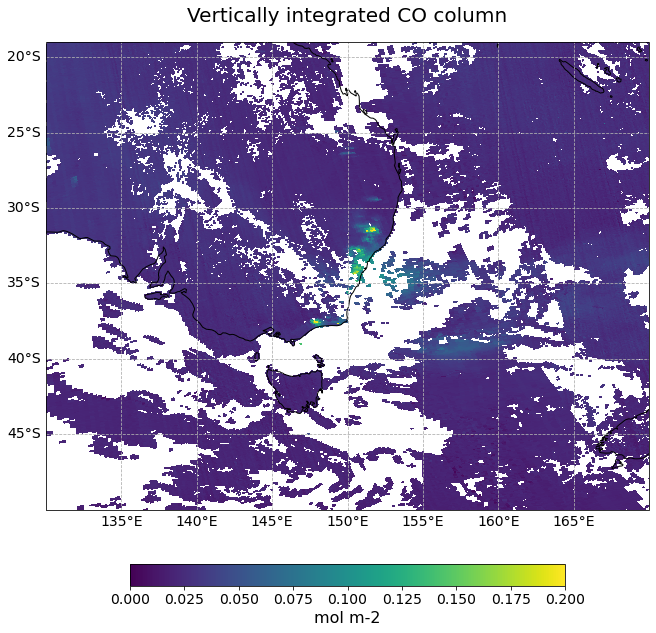

In [16]:
visualize_pcolormesh(data_array=s5p_co_subset,
                     longitude=s5p_co_subset.longitude,
                     latitude=s5p_co_subset.latitude,
                     projection=ccrs.PlateCarree(),
                     color_scale='viridis',
                     unit=units,
                     long_name=long_name,
                     vmin=0, 
                     vmax=0.2,
                     lonmin=lonmin,
                     lonmax=lonmax,
                     latmin=latmin,
                     latmax=latmax,
                     set_global=False)

#### <a id='convert'></a>6. Convert the CO values from `mol per m-2` to `molecules per cm-2`

Sentinel-5P data are disseminated in `SI units` and the `SI unit` for the total column of carbon monoxide is `mol per m`<sup>`2`</sup>. A more common unit is `molecules per cm`<sup>`2`</sup> though. Let us convert the values from `mol per m`<sup>`2`</sup> to `molecules per cm`<sup>`2`</sup> with the help of the defined `multiplication factor` you have defined before.

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Convert the data values of the subsetted DataArray to `molecules per cm`<sup>`2`</sup> by multiplying the DataArray with the <code>multiplication_factor</code>.
You might want to store the multiplication facor attribute as separate variable.

<b>NOTE:</b><br>
The multiplication factor is provided in the attributes of the DataArray **s5p_co_subset**.
</div>

In [17]:
# Enter your solution here








In [18]:
multiplication_factor = s5p_co_subset.multiplication_factor_to_convert_to_molecules_percm2
print(multiplication_factor)

s5p_co_subset_converted = s5p_co_subset*multiplication_factor
print(s5p_co_subset_converted)

6.022141e+19
<xarray.DataArray 'carbonmonoxide_total_column' (scanline: 1462, ground_pixel: 215)>
dask.array<mul, shape=(1462, 215), dtype=float32, chunksize=(768, 215), chunktype=numpy.ndarray>
Coordinates:
  * scanline      (scanline) float64 1.523e+03 1.524e+03 ... 2.192e+03 2.193e+03
  * ground_pixel  (ground_pixel) float64 0.0 1.0 2.0 3.0 ... 212.0 213.0 214.0
    time          datetime64[ns] 2019-12-29
    latitude      (scanline, ground_pixel) float32 dask.array<chunksize=(694, 215), meta=np.ndarray>
    longitude     (scanline, ground_pixel) float32 dask.array<chunksize=(694, 215), meta=np.ndarray>


<br>

In a final step, we want to visualize the DataArray again, but this time with the data values converted to `molecules per cm`<sup>`2`</sup>.

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Visualize the DataArray `s5p_co_subset_converted` with the function [visualize_pcolormesh](../functions.ipynb#visualize_pcolormesh).

<b>HINT:</b><br>
You might need to make adjustments to the following keyword arguments:

* **unit**
* the **DataArray** itself,
* **latitude** and **longitude**
* **vmin** and **vmax**
</div>

In [19]:
# Enter your solution here








(<Figure size 1440x720 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'Vertically integrated CO column'}>)

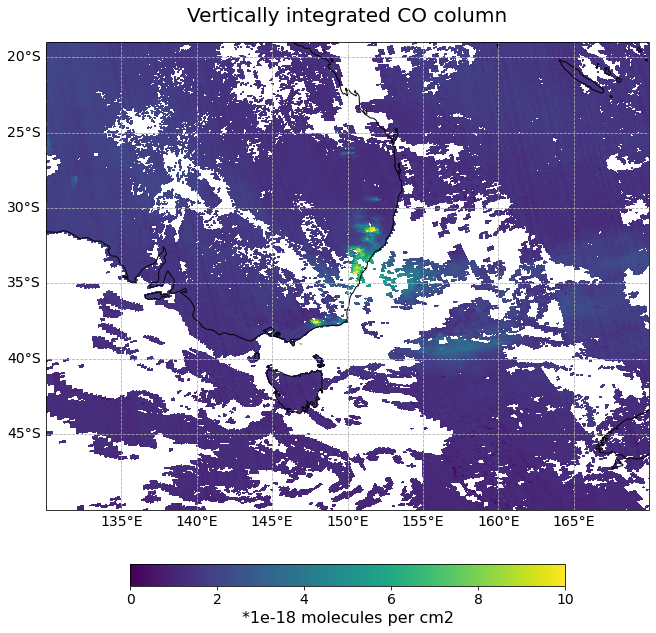

In [20]:
visualize_pcolormesh(data_array=s5p_co_subset_converted * 1e-18,
                     longitude=s5p_co_subset_converted.longitude,
                     latitude=s5p_co_subset_converted.latitude,
                     projection=ccrs.PlateCarree(),
                     color_scale='viridis',
                     unit='*1e-18 molecules per cm2',
                     long_name=long_name,
                     vmin=0, 
                     vmax=10,
                     lonmin=lonmin,
                     lonmax=lonmax,
                     latmin=latmin,
                     latmax=latmax,
                     set_global=False)

<br>

<a href="../00_index.ipynb"><< Index</a><span style="float:right;"><a href="./421_Sentinel-3_OLCI_L1_exercise.ipynb">421 - Exercise - Sentinel-3 OLCI - Level 1 >></a></span>

<hr>

<p><img src='../img/copernicus_logo.png' align='left' alt='Logo EU Copernicus' width='25%'></img></p>
<br clear=left>
<p style="text-align:left;">This project is licensed under the <a href="../LICENSE">MIT License</a> <span style="float:right;"><a href="https://gitlab.eumetsat.int/eumetlab/atmosphere/atmosphere">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a>